# Titanic Survivability Prediction

## Nate Borries
### May 2023

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Data Exploration

In [2]:
df = pd.read_csv(r"C:\Users\Nate\Documents\DataPortfolio\Titanic Survivability\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### Observation: Name most likely has no effect on survivability. If it does, assume name is correlated with certain classes. Likewise, the actual ticket number will have no effect-- best estimate is that the fare prise and cabin would contain enough ticket information that may impact survivability. 

##### Remember, certain values within data set columns have different meanings: 

##### 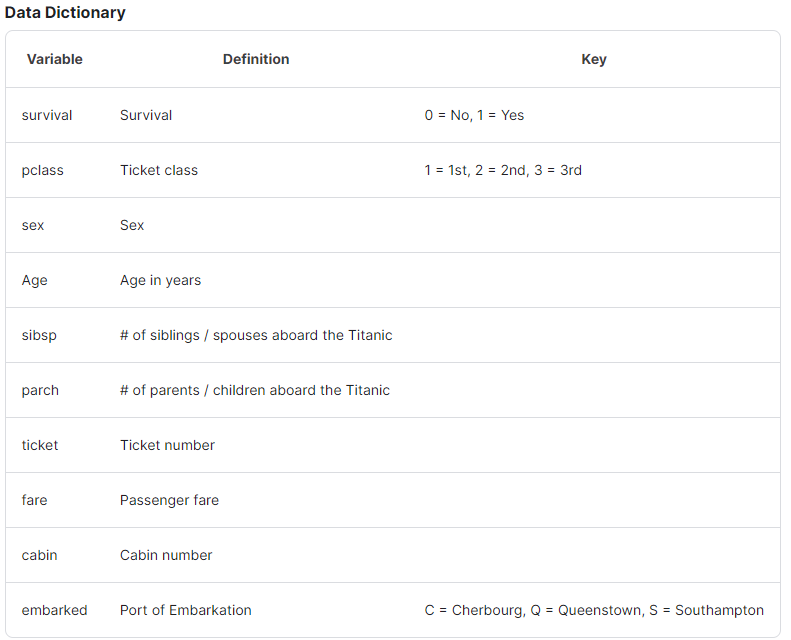

In [3]:
df.describe() # view information about the values found in each column.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Correlation Heat Map with Seaborn

#### We want to know what is correlated with "Survived." The closer the correlation value is to zero, the less correlation present. 

C:\Users\Nate\AppData\Local\Temp\ipykernel_19400\3913136093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "Blues") #


<function matplotlib.pyplot.show(close=None, block=None)>

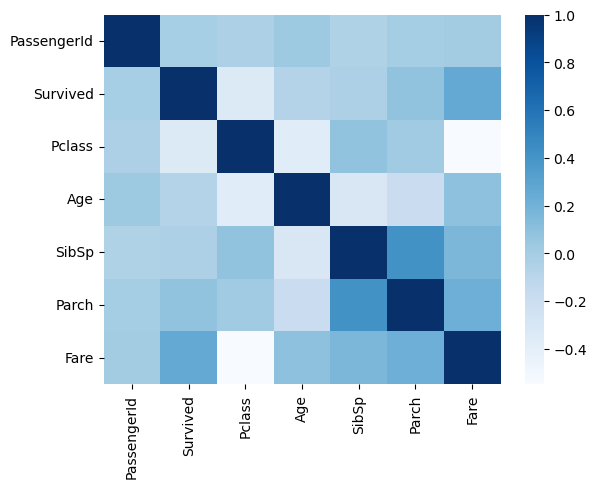

In [4]:
sns.heatmap(df.corr(), cmap = "Blues") #
plt.show 

#### Based on the heat map, "Pclass" has a large negative correlation value which means the lower the "Pclass" value (1=1st Class, 2=2nd Class, etc.), the higher chance of survivability. 
#### Note: Gender does not show up on the heat map. This is because the Gender values are not numerical. 

## Stratified Shuffle Split 

#### Shuffle whole data set, and pick 80% for training and 20% for testing. Usually works out okay, but random is random!!!

#### We want to ensure that the training set and testing set look similar. So, we can pick the features we want to have similar distributions in both data sets (those features with high correlation values!). 

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2) 
for train_indeces, test_indeces in split.split(df, df[["Survived","Pclass","Sex"]]): # Specify features we want to have similar distributions.
    strat_train_set = df.loc[train_indeces]
    strat_test_set = df.loc[test_indeces]

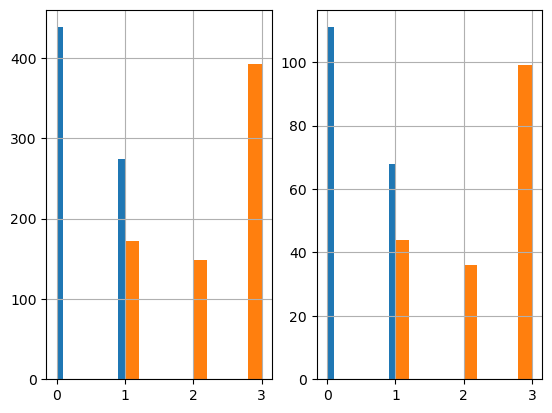

In [6]:
# did it work? 

strat_train_set # values look random...

train_dist_check=plt.subplot(1,2,1)
train_survived=strat_train_set['Survived'].hist() # does Survived distribution look okay? Use plots to check.
train_pclass=strat_train_set['Pclass'].hist() # does Pclass distribution look okay? Use plots to check.

test_dist_check=plt.subplot(1,2,2)
strat_test_set['Survived'].hist() # does Survived distribution look okay? Use plots to check.
strat_test_set['Pclass'].hist() # does Pclass distribution look okay? Use plots to check.

plt.show() # show plots: blue bars are survived, orange bars are pclass

In [7]:
# do we have any missing values? 

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 838 to 517
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          580 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


#### Looks like Age, Cabin and Embarked are missing values! We need to fill in the gaps to make a successful model. 

# Estimators

### How do we fill in the missing values for Age? Use imputation!

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin # BE is a class to define basic estimator, TM is just a function!
from sklearn.impute import SimpleImputer # Impute => How do we fill in the missing values? Mean, etc.?

class AgeImputer (BaseEstimator, TransformerMixin): # We want to fill in the missing values for Age
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean') # use mean to fill in missing values.
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

## One-Hot Encoding

#### Need to create binary values for columns that are not numerical. Let's create binary features for both Embark and Sex data points.


In [9]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X, y=None):
        return self
   
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray() # make matrix into an array
        column_names = ["C","S","Q","N"]
        for i in range(len(matrix.T)): # flip dimenstion of matrix
            X[column_names[i]]= matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray() # make matrix into an array             
        column_names = ["Female","Male"] 
        for i in range(len(matrix.T)): # flip dimenstion of matrix
            X[column_names[i]] = matrix.T[i]
        return X

## Drop Columns

### Based off of our correlation heat map, not all columns are important. Let's drop some columns.

In [10]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Name","Ticket","Cabin","N","Sex","Embarked"], axis=1, errors="ignore") # specify columns we wish to drop.
    

# Pipeline

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageImputer", AgeImputer()),
                     ("featureEncoder",FeatureEncoder()),
                     ("featureDropper",FeatureDropper())])

## Run training data set through estimators and pipeline to replace/edit/drop data from original data set.

In [12]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 838 to 517
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          580 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [13]:
strat_train_set = pipeline.fit_transform(strat_train_set) # rename strat_train_set to revised data set
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 838 to 517
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [14]:
strat_train_set # view new data training set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
838,839,1,3,32.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
493,494,0,1,71.000000,0,0,49.5042,1.0,0.0,0.0,0.0,1.0
337,338,1,1,41.000000,0,0,134.5000,1.0,0.0,0.0,1.0,0.0
810,811,0,3,26.000000,0,0,7.8875,0.0,0.0,1.0,0.0,1.0
59,60,0,3,11.000000,5,2,46.9000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,25.000000,0,0,7.6500,0.0,0.0,1.0,0.0,1.0
36,37,1,3,29.633052,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
204,205,1,3,18.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
451,452,0,3,29.633052,1,0,19.9667,0.0,0.0,1.0,0.0,1.0


In [15]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis = 1) # X is everything but Survived
y = strat_train_set['Survived'] # Y is Survived


scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy() # scaler returns numpy array

# Select, Run, and Evaluate Model

## Use Random Forest Classifer

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV # Cross Validation - 100% of data should be split into 10 folds. 9 folds train the model, then we train with the other 1 fold. Then repeat for every outcome. 

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10,100,200,500], "max_depth" : [None,5,10], "min_samples_split":[2,3,4]} # CV using RFC with all values within list
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score = True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [18]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

## Best model had a max depth of 10 and n estimators of 200. 

In [19]:
strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
856,857,1,1,45.000000,1,1,164.8667,0.0,0.0,1.0,1.0,0.0
482,483,0,3,50.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
284,285,0,1,29.985075,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
497,498,0,3,29.985075,0,0,15.1000,0.0,0.0,1.0,0.0,1.0
733,734,0,2,23.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,1,2,30.000000,0,0,12.3500,0.0,1.0,0.0,1.0,0.0
109,110,1,3,29.985075,1,0,24.1500,0.0,1.0,0.0,1.0,0.0
550,551,1,1,17.000000,0,2,110.8833,1.0,0.0,0.0,0.0,1.0
779,780,1,1,43.000000,0,1,211.3375,0.0,0.0,1.0,1.0,0.0


In [21]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X)
y_data_test = y.to_numpy() # scaler returns numpy array

# Final Evaluation: 95% Accuracy

In [22]:
final_clf.score(X_data_test, y_data_test) # how good is X data compared to y data

0.9592696629213483

### Now train model on ALL of the data

In [24]:
# combine training and test data into the final data set... but we also have that already aka df. 
# df still has old format

final_data = pipeline.fit_transform(df)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [29]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X)
y_data_final = y.to_numpy() # scaler returns numpy array

In [30]:
# run grid search on final data.

prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10,100,200,500], "max_depth" : [None,5,10], "min_samples_split":[2,3,4]} # CV using RFC with all values within list
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score = True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [32]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [36]:
titanic_test_data=pd.read_csv(r"C:\Users\Nate\Documents\DataPortfolio\Titanic Survivability\test.csv")
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [38]:
final_test_data.info

<bound method DataFrame.info of      PassengerId  Pclass       Age  SibSp  Parch      Fare    C    S    Q  \
0            892       3  34.50000      0      0    7.8292  0.0  1.0  0.0   
1            893       3  47.00000      1      0    7.0000  0.0  0.0  1.0   
2            894       2  62.00000      0      0    9.6875  0.0  1.0  0.0   
3            895       3  27.00000      0      0    8.6625  0.0  0.0  1.0   
4            896       3  22.00000      1      1   12.2875  0.0  0.0  1.0   
..           ...     ...       ...    ...    ...       ...  ...  ...  ...   
413         1305       3  30.27259      0      0    8.0500  0.0  0.0  1.0   
414         1306       1  39.00000      0      0  108.9000  1.0  0.0  0.0   
415         1307       3  38.50000      0      0    7.2500  0.0  0.0  1.0   
416         1308       3  30.27259      0      0    8.0500  0.0  0.0  1.0   
417         1309       3  30.27259      1      1   22.3583  1.0  0.0  0.0   

     Female  Male  
0       0.0   1.0  
1  

In [41]:
# we have a null value

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill") # no imputer

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [44]:
predictions = prod_final_clf.predict(X_data_final_test)

In [46]:
# create df

final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv(r"C:\Users\Nate\Documents\DataPortfolio\Titanic Survivability\predictions.csv",index=False)

# Final Predictions by Passenger ID

### Value of 1 = Survived, Value of 0 = Did Not Survive

In [47]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
